In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

In [2]:
# impot data
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalise image data
X_train, X_test = X_train / 255., X_test / 255.

# Add dimension to image data
X_train = X_train.reshape(60000, 28, 28, 1)
X_test  = X_test.reshape(10000, 28, 28, 1)

print(f"Train\t: {X_train.shape}")
print(f"Test\t: {X_test.shape}")

Train	: (60000, 28, 28, 1)
Test	: (10000, 28, 28, 1)


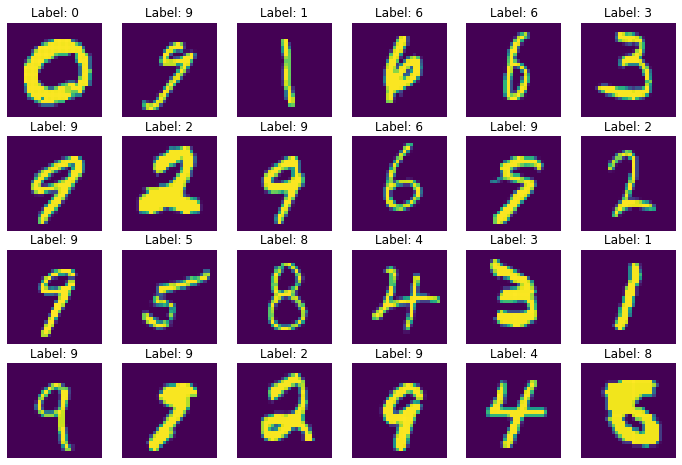

In [3]:
# check train images
nrows, ncols = 4, 6
fig = plt.figure(figsize=(ncols*2, nrows*2))
indices = np.random.randint(0, X_train.shape[0], nrows*ncols)

for i, index in enumerate(indices):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis("off")
  sp.set_title(f"Label: {y_train[index]}")
  plt.imshow(X_train[index].reshape(28, 28))

In [4]:
# Define CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu", input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(216, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation = "softmax")   
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 216)       124632    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 216)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 5400)              0         
                                                                 
 dense (Dense)               (None, 512)               2

In [5]:
# configure model and callbacks for training 
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
    loss="sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.97):
            self.model.stop_training = True

callbacks = [myCallback()]

In [6]:
# start training with callbacks
model.fit(
    X_train, y_train, epochs=50, verbose = 1, callbacks = callbacks
)

Epoch 1/50
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1318 - accuracy: 0.9590
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0459 - accuracy: 0.9861


In [7]:
# Evaluate model performance
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0293 - accuracy: 0.9891


[0.02933693490922451, 0.9890999794006348]